In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import (MultipleLocator, 
                               FormatStrFormatter, 
                               AutoMinorLocator)

#### Load data

In [2]:
data = pd.read_csv("population_sizes.csv")

In [3]:
data.head()

,report_month,churn,gain,total,registrations
0,2009-01-01,0.0,24.0,0.0,11946
1,2009-02-01,2.0,14.0,24.0,12049
2,2009-03-01,3.0,4.0,36.0,11697
3,2009-04-01,3.0,4.0,37.0,9582
4,2009-05-01,2.0,3.0,38.0,10052


In [4]:
len(data)

156

#### 1) Churn rate, conversion rate, regisztracio novekedesi utem, ami eszembe jut

Mivel nincs lemorzsolódó 2009 január elöttről azt feltételezem, hogy ekkor indul az egész biznisz úgy, ahogy van, vagyis az összes regisztrált száma egy kummulált összeg lesz.

In [9]:
data = data.assign(
    user_count = lambda x:x.registrations.cumsum(),
    churn_rate_per_subscriber = lambda x: x.churn / x.total,
    churn_rate_per_user = lambda x: x.churn / x.user_count,
    conv_rate_per_subscriber = lambda x: x.gain / x.total,
    conv_rate_per_user = lambda x:x.gain / x.user_count,
    reg_delta = lambda x: x.registrations / x.registrations.shift(1),
    churn_delta = lambda x: x.churn / x.churn.shift(1),
    gain_delta = lambda x: x.gain / x.gain.shift(1),
    date = lambda x: pd.to_datetime(x.report_month),
    year = lambda x: x.date.dt.year,
    month = lambda x: x.date.dt.month
)

In [12]:
data.head()

,report_month,churn,gain,total,registrations,user_count,churn_rate_per_subscriber,churn_rate_per_user,conv_rate_per_subscriber,conv_rate_per_user,reg_delta,churn_delta,gain_delta,date,year,month
0,2009-01-01,0.0,24.0,0.0,11946,11946,NaN,0.000000,inf,0.002009,NaN,NaN,NaN,2009-01-01,2009,1
1,2009-02-01,2.0,14.0,24.0,12049,23995,0.083333,0.000083,0.583333,0.000583,1.008622,inf,0.583333,2009-02-01,2009,2
2,2009-03-01,3.0,4.0,36.0,11697,35692,0.083333,0.000084,0.111111,0.000112,0.970786,1.500000,0.285714,2009-03-01,2009,3
3,2009-04-01,3.0,4.0,37.0,9582,45274,0.081081,0.000066,0.108108,0.000088,0.819184,1.000000,1.000000,2009-04-01,2009,4
4,2009-05-01,2.0,3.0,38.0,10052,55326,0.052632,0.000036,0.078947,0.000054,1.049050,0.666667,0.750000,2009-05-01,2009,5


In [17]:
data.dtypes

report_month                         object
churn                               float64
gain                                float64
total                               float64
registrations                         int64
user_count                            int64
churn_rate_per_subscriber           float64
churn_rate_per_user                 float64
conv_rate_per_subscriber            float64
conv_rate_per_user                  float64
reg_delta                           float64
churn_delta                         float64
gain_delta                          float64
date                         datetime64[ns]
year                                  int32
month                                 int32
dtype: object

#### 2) Populáció dinamikája

A populáció alatt az előfizetőket és a regisztrálókat is érthetjük. Lesz egy, ezek abszolút értékét ábrázoló ábra és egy, ami az új előfizetők, regisztrálók, lemorzsolódók változásának az ütemét ábrázolja majd


##### a) Plot

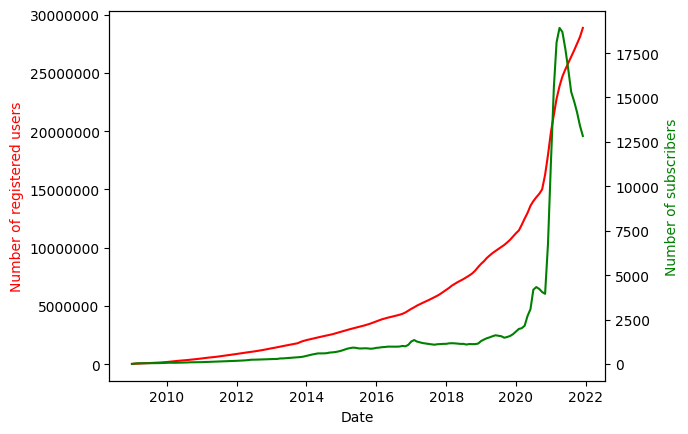

In [25]:
fig, ax1 = plt.subplots()
ax1.plot(data["date"],data["user_count"],color = "red")
ax1.set_xlabel("Date")
ax1.set_ylabel("Number of registered users",color = "red")
ax1.yaxis.set_major_formatter(FormatStrFormatter('%1.0f'))

ax2 = ax1.twinx()
ax2.plot(data["date"],data["total"], color = "green")
ax2.set_ylabel("Number of subscribers",color = "green")
plt.show()

report_month                         object
churn                               float64
gain                                float64
total                               float64
registrations                         int64
user_count                            int64
churn_rate_per_subscriber           float64
churn_rate_per_user                 float64
conv_rate_per_subscriber            float64
conv_rate_per_user                  float64
reg_delta                           float64
churn_delta                         float64
gain_delta                          float64
date                         datetime64[ns]
year                                  int32
month                                 int32
dtype: object